<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/dev%2Fquiquex%2Fpatternrecognition/Copia_de_PR04_Red_Densa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimeinto de Patrones
## Dr. Carlos Vilaseñor
## Red neuronal densa (Multi-Layer Perceptrón)

# MLP regresor

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)
m = 300
r = 0.5
ruido = r* np.random.randn(m, 1)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + ruido

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

Iteration 1, loss = 7.76884165
Validation score: -0.841621
Iteration 2, loss = 6.39944721
Validation score: -0.426294
Iteration 3, loss = 4.56961441
Validation score: 0.074454
Iteration 4, loss = 2.58738937
Validation score: 0.512665
Iteration 5, loss = 1.08507662
Validation score: 0.768506
Iteration 6, loss = 0.36391927
Validation score: 0.874875
Iteration 7, loss = 0.20004259
Validation score: 0.897524
Iteration 8, loss = 0.18712123
Validation score: 0.902917
Iteration 9, loss = 0.17665679
Validation score: 0.908297
Iteration 10, loss = 0.17028754
Validation score: 0.909194
Iteration 11, loss = 0.16612321
Validation score: 0.912904
Iteration 12, loss = 0.16242111
Validation score: 0.914600
Iteration 13, loss = 0.15778590
Validation score: 0.915833
Iteration 14, loss = 0.15729028
Validation score: 0.919532
Iteration 15, loss = 0.15308148
Validation score: 0.920461
Iteration 16, loss = 0.15308859
Validation score: 0.921233
Iteration 17, loss = 0.15127530
Validation score: 0.925732
Iter

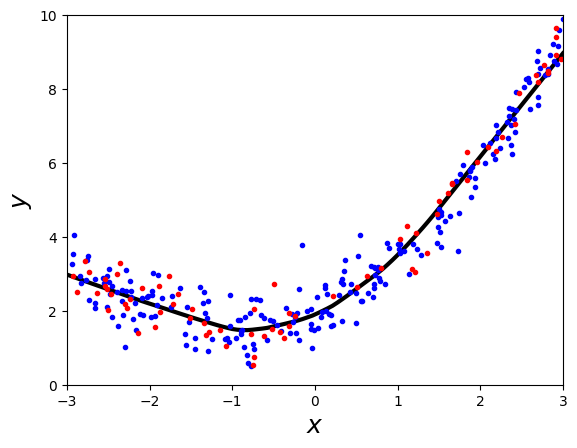

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,20), solver='adam', activation='relu',
                     validation_fraction=0.1,early_stopping=True,
                     batch_size=10, verbose=1)
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(x_new)

plt.plot(x_new, y_pred,'k-',  linewidth=3)
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

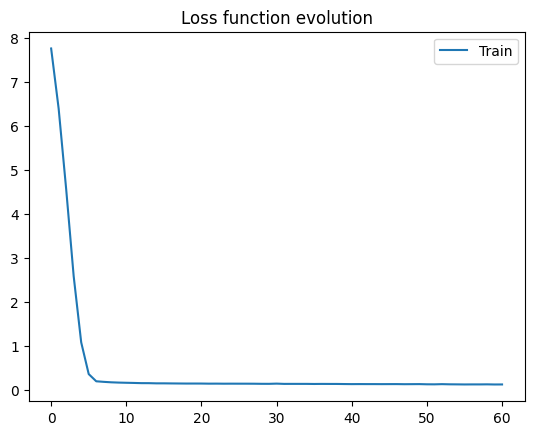

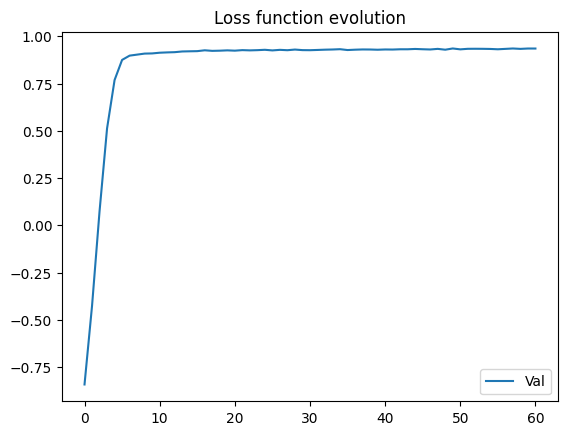

In [ ]:
loss = model.loss_curve_
plt.figure()
plt.plot(loss, label='Train')
plt.title('Loss function evolution')
plt.legend()

val_scores = model.validation_scores_
plt.figure()
plt.plot(val_scores, label='Val')
plt.title('Loss function evolution')
plt.legend()

# MLP Clasificador

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1)
rng = np.random.RandomState(2)
x += 1 * rng.uniform(size=x.shape)
linearly_separable = (x, y)

datasets = [make_moons(noise=0.1),
            make_circles(noise=0.1, factor=0.5),
            linearly_separable ]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


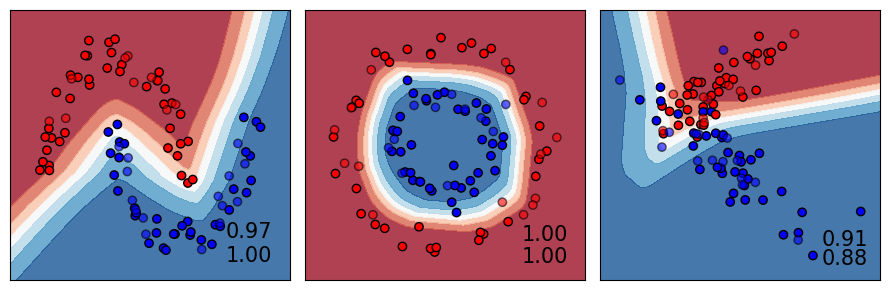

In [ ]:
figure = plt.figure(figsize=(9, 3))
h = .02  # step
i = 1 # counter


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

    x, y = ds
    x = StandardScaler().fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    model= MLPClassifier(alpha=0.1, max_iter=700)
    ax = plt.subplot(1, 3, i)
    model.fit(xtrain, ytrain)
    score_train = model.score(xtrain, ytrain)
    score_test = model.score(xtest, ytest)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(model, "decision_function"):
        zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    ax.text(xx.max() - .3, yy.min() + .7, '%.2f' % score_train,
            size=15, horizontalalignment='right')

    ax.text(xx.max() - .3, yy.min() + .3, '%.2f' % score_test,
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()